## Business Problem

A company specializing in highschool tutoring is looking to expand operations in Ontario, Canada. It would like to offer franchise opportunities to investors, but first it must research where it should invest it's marketing efforts towards potential investors which would in turn inform upon strategic locations to setup tutoring locations.

## Analysis Approach

The research involves and analysis using data from Fraser Institute, which produces annual statistics on Canadian school rankings.  The analysis will also merge Geo data to map the school, rankings and location to provide insight into potential areas to market and invest. Potential methods of analysis would look at clustering analysis to group high, mid and low academic performing areas. In addition it will potentially look into other similar education offerings which might pose as competition.


In [35]:
# Import Fraser Institute data
#
ranking_file='view-source_ontario.compareschoolrankings.org_elementary_Al-Risala_Academy_Mississauga_Report_Card.aspx.html'
from bs4 import BeautifulSoup
import pandas as pd



In [36]:
# Use BeautifulSoup library to parse HTML to create dataframe
#
soup = BeautifulSoup(open(ranking_file), "html.parser")
school_ranking_df=pd.DataFrame (columns=['SchoolName','Latitude','Longitude','SchoolType','Rank','RankColor'])
for ranking in soup.find_all('td',{'class':'line-content'}):
    #if ranking.contains('slMapData'):
    data=str(ranking.contents[0])
    if "slMapData[" in data:
        prep_data=data.split(',')
        data_array=[prep_data[4].replace('"',''),float(prep_data[1]),float(prep_data[2]),prep_data[5].replace('"',''),prep_data[6].replace('"',''),prep_data[8].replace('"','').replace(' ','')]
        school_ranking_df.loc[len(school_ranking_df)]=data_array


IndexError: list index out of range

In [37]:
# Show dataframe sample data
#
school_ranking_df.head()


,SchoolName,Latitude,Longitude,SchoolType,Rank,RankColor
0,Abe Scatch Memorial,52.113326,-94.255717,First Nation,0.0,red
1,Tsi Snaihne,45.012268,-74.599731,First Nation,4.9,orange
2,Lakeview,45.796337,-82.157062,First Nation,0.8,red
3,A A Wright,42.590318,-82.403679,Public,3.9,red
4,Cité-Jeunesse,44.114081,-77.556083,Public,6.3,yellow


In [38]:
# Plot map of schools
#
import folium
m = folium.Map([43.7076049,-79.3707831],zoom_start=10 )
# Add neighbourhood markers
for index, row in school_ranking_df[school_ranking_df['RankColor']=='green'].iterrows():
    color=row['RankColor']     
    folium.CircleMarker([row['Latitude'], row['Longitude']],radius=3,color=color,fill=True,popup=row['SchoolName'].replace("'",'')).add_to(m)
m


In [40]:
from sklearn.cluster import  DBSCAN
from sklearn import metrics
import numpy as np

km_per_radian=6371.0088
epsilon = 2.5/km_per_radian
min_samples = 7

coords = school_ranking_df[school_ranking_df['RankColor']=='green'].as_matrix(['Latitude','Longitude'])
db = DBSCAN(eps=epsilon, min_samples=min_samples,algorithm='ball_tree',metric='haversine').fit(np.radians(coords))
cluster_labels=db.labels_
cluster_labels

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


array([-1, -1, -1, -1,  0,  0, -1, -1,  1, -1,  0,  1, -1, -1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1,  1,  1,
        0,  1, -1, -1,  0, -1, -1,  0,  0,  0, -1, -1,  0, -1, -1,  0,  3,
        0, -1, -1, -1,  4, -1,  0, -1,  1,  0, -1, -1, -1, -1,  0, -1, -1,
       -1,  2, -1, -1, -1, -1,  0, -1, -1,  4,  0,  1, -1, -1, -1,  1, -1,
       -1,  0, -1,  4, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  0, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
       -1, -1, -1, -1,  4, -1,  5, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        0, -1, -1, -1, -1, -1,  1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1,  3, -1, -1, -1, -1, -1,  1, -1,  0,  1,  0, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  0, -1,  3,  1,  1,  0, -1,  1,  1, -1,
        1, -1,  0,  0,  3

In [41]:
n_clusters=len(set(cluster_labels))
n_clusters
np.unique(cluster_labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [42]:
# get the cluster
# cluster_labels = -1 means outliers
clusters = \
    pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])
print(clusters.shape)

#master_school_cluster_df=school_cluster_df.merge(school_ranking_df, how='inner', 
 #                       left_on=['Latitude'], right_on=['Latitude'])
#master_school_cluster_df.head(20)
#master_school_cluster_df['SchoolName_y'].iloc[3]

(8,)


In [43]:
# center points
centers=[[6,45.3534928,-75.7693796],           
[3,43.859296,-79.465751],
[2,43.7201,-79.4143],
[2,43.6377585,-79.4971673],
[2,43.6618828,-79.4397232],
[2,43.6473095,-79.4173512],
[2,43.6553373,-79.3779509],
[2,43.6818631,-79.337862],
[2,43.6994457,-79.3950161],
[2,43.720,-79.4143],
[4,43.4591933,-79.7117058],
[4,43.4339276,-79.7292753],
[5,43.1808427, -79.2305854],
[1,43.7704262, -79.2478531],
[1,43.779948, -79.292082],
[1,43.8086882, -79.3178795],
[1,43.818416, -79.279883],
[1,43.874601,-79.351835],
[1,43.891178, -79.285357],
[1,43.8588085, -79.2473505]]
lat_centers=[i[1] for i in centers]
lon_centers=[i[2] for i in centers]

In [44]:
centers

[[6, 45.3534928, -75.7693796],
 [3, 43.859296, -79.465751],
 [2, 43.7201, -79.4143],
 [2, 43.6377585, -79.4971673],
 [2, 43.6618828, -79.4397232],
 [2, 43.6473095, -79.4173512],
 [2, 43.6553373, -79.3779509],
 [2, 43.6818631, -79.337862],
 [2, 43.6994457, -79.3950161],
 [2, 43.72, -79.4143],
 [4, 43.4591933, -79.7117058],
 [4, 43.4339276, -79.7292753],
 [5, 43.1808427, -79.2305854],
 [1, 43.7704262, -79.2478531],
 [1, 43.779948, -79.292082],
 [1, 43.8086882, -79.3178795],
 [1, 43.818416, -79.279883],
 [1, 43.874601, -79.351835],
 [1, 43.891178, -79.285357],
 [1, 43.8588085, -79.2473505]]

In [45]:
import seaborn as sns
import itertools
sns.set()
palette=itertools.cycle(sns.color_palette().as_hex())

# set starting point
m = folium.Map([43.7076049,-79.3707831],zoom_start=10 )

unique_label = np.unique(cluster_labels)

print("Clusters:" ,n_clusters)
a=0

school_cluster_df=pd.DataFrame(columns=['Cluster','Latitude','Longitude','SchoolName'])

# plot different clusters on map, note that the black dots are 
# outliers that not belone to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    loc=np.stack((lats_select, lons_select), axis=-1)
    
    color=next(palette)
   
    for loc_a  in loc:
        if i!=0 :    # Dont plot outliers
            
            popstring="cluster: "+str(i)+"<br>"+str(loc_a[0])+' '+str(loc_a[1])
            if (loc_a[0] in lat_centers) and (loc_a[1] in lon_centers) :
                    fill_color='black'
            else:
                    fill_color=color
            folium.CircleMarker(loc_a,radius=5,color=color,fill=True,popup=popstring,
                               fill_color=fill_color, fill_opacity=1 ).add_to(m)
        school_cluster_df.loc[len(school_cluster_df)]=[int(i),loc_a[0],loc_a[1],'']
    
        
m



Clusters: 7


In [46]:
#school_cluster_df.head()
school_cluster_df['Cluster'].value_counts()
school_cluster_count=school_cluster_df['Cluster'].value_counts().to_frame()
school_cluster_count

,Cluster
0,405
1,59
2,55
4,15
5,10
6,7
3,7


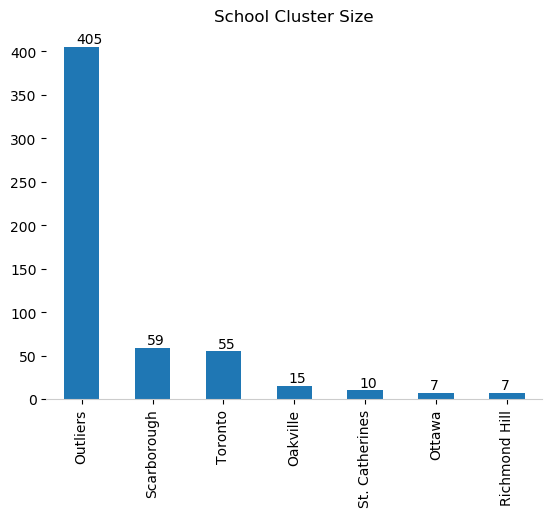

In [47]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


neighborhoods=['Outliers','Scarborough','Toronto','Oakville','St. Catherines','Ottawa','Richmond Hill']

venue_count=school_cluster_df['Cluster'].value_counts()

y_pos = np.arange(len(neighborhoods))
#ax=school_cluster_count.plot( kind='bar')
ax=school_cluster_count.plot(kind='bar')
#plt.yticks(y_pos, neighborhoods)
plt.xticks(y_pos, neighborhoods)
#plt.xlabel('Usage')
plt.title('School Cluster Size')
 
ax.spines['left'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['bottom'].set_color('#CCCCCC');
ax.legend().set_visible(False)
x_offset = -.08
y_offset = 4.00
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)   
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.show()


In [48]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         876 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0

The follow

In [51]:
CLIENT_ID = 'JIPO3TFCVGDWSAMKVIKQTYF4CXD31G4UR4KSOGRD0ZUJXVIG' # your Foursquare ID
CLIENT_SECRET = 'FE5BRZTWLH1O21ZS05WA0HM2XM2VDVEDCXU2PSJS4YZQUN2Z' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
latitude=43.6553373
longitude=-79.3779509
 

Your credentails:
CLIENT_ID: JIPO3TFCVGDWSAMKVIKQTYF4CXD31G4UR4KSOGRD0ZUJXVIG
CLIENT_SECRET:FE5BRZTWLH1O21ZS05WA0HM2XM2VDVEDCXU2PSJS4YZQUN2Z


In [52]:
# Locate Tutoring venues around centers
#
venues_dataframe=pd.DataFrame()
temp_venues_dataframe=pd.DataFrame()
search_query = 'Tutoring'
radius = 5000 # 5km

for i in range(len(centers)):
    latitude=centers[i][1]
    longitude=centers[i][2]
    cluster=centers[i][0]
    

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    #print(url)
    results = requests.get(url).json()
    #print(results)
    venues = results['response']['venues']
    #print(venues)
    # tranform venues into a dataframe
    temp_venues_dataframe=json_normalize(venues)
    temp_venues_dataframe['cluster']=cluster
   
    venues_dataframe=venues_dataframe.append(temp_venues_dataframe)


venues_dataframe.head()


,categories,cluster,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",6,False,4e027536c65b8061424b64ca,NaN,CA,Ottawa,Canada,NaN,2035.0,"[Ottawa ON, Canada]","[{'label': 'display', 'lat': 45.350192, 'lng':...",45.350192,-75.794966,NaN,ON,Pinecrest Pathways Tutoring,v-1552713925,NaN
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",3,False,50c413fe29a6c41446e39e5b,"108 Sir Sanford Fleming Way, Maple",CA,Vaughan,Canada,NaN,1760.0,"[108 Sir Sanford Fleming Way, Maple, Vaughan ...","[{'label': 'display', 'lat': 43.85295863983517...",43.852959,-79.485848,L6A 0V3,ON,Mathwhisperer Tutoring Services,v-1552713925,NaN
1,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",3,False,5127d2c919a973e2a46e2b8e,71 Golden Orchard Road,CA,Vaughan,Canada,NaN,2465.0,"[71 Golden Orchard Road, Vaughan ON L6a 0m7, C...","[{'label': 'display', 'lat': 43.85460928675069...",43.854609,-79.495772,L6a 0m7,ON,Math up tutoring,v-1552713925,NaN
2,"[{'id': '4bf58dd8d48988d105951735', 'name': 'K...",3,False,5b61f46fe17910002c5023e6,10815 Bathurst Street Suite 20a,CA,Richmond Hill,Canada,Bathurst Street and Elgin Mills,2730.0,[10815 Bathurst Street Suite 20a (Bathurst Str...,"[{'label': 'display', 'lat': 43.88382040274744...",43.883820,-79.466450,L3C 9Y2,ON,SMARTY PANTS TUTORING,v-1552713925,NaN
3,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",3,False,5b68180e61e53b002c958712,10815 Bathurst Street Suite 20a,CA,Richmond Hill,Canada,NaN,3029.0,"[10815 Bathurst Street Suite 20a, Richmond Hil...","[{'label': 'display', 'lat': 43.88651134774929...",43.886511,-79.465420,L4C 9Y2,ON,Smarty Pants Tutoring,v-1552713925,NaN


In [53]:
venues_df_count=venues_dataframe['cluster'].value_counts().to_frame()
venues_df_count

,cluster
2,25
4,6
3,5
1,4
6,1


In [43]:
venues_dataframe[venues_dataframe['cluster']==2]

,categories,cluster,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '56aa371ce4b08b9a8d573570', 'name': 'A...",2,False,576097c1498e776dba6751fe,21 Tichester Rd,CA,Toronto,Canada,NaN,3839.0,"[21 Tichester Rd, Toronto ON M5P 1P3, Canada]","[{'label': 'display', 'lat': 43.6856699, 'lng'...",43.685670,-79.417030,M5P 1P3,ON,OzPrep LSAT Tutoring,v-1552688722,202380931
1,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",2,False,51f2839e8bbddf101c928982,1067 Davenport rd,CA,Toronto,Canada,NaN,5132.0,"[1067 Davenport rd, Toronto ON M6G 2C2, Canada]","[{'label': 'display', 'lat': 43.6749024388996,...",43.674902,-79.426925,M6G 2C2,ON,French Tutoring Centre,v-1552688722,NaN
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",2,False,5985d339270ee749da99488b,NaN,CA,Toronto,Canada,NaN,4684.0,"[Toronto ON M4V 1E1, Canada]","[{'label': 'display', 'lat': 43.681222, 'lng':...",43.681222,-79.392032,M4V 1E1,ON,Tutoring Club,v-1552688722,NaN
3,[],2,False,5afefe8e31fd14002ca12de3,822 Roselawn Avenue,CA,Toronto,Canada,NaN,2788.0,"[822 Roselawn Avenue, Toronto ON M6B 1B4, Canada]","[{'label': 'display', 'lat': 43.7027951, 'lng'...",43.702795,-79.439364,M6B 1B4,ON,Computer Science Tutoring,v-1552688722,NaN
0,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",2,False,51f2839e8bbddf101c928982,1067 Davenport rd,CA,Toronto,Canada,NaN,1778.0,"[1067 Davenport rd, Toronto ON M6G 2C2, Canada]","[{'label': 'display', 'lat': 43.6749024388996,...",43.674902,-79.426925,M6G 2C2,ON,French Tutoring Centre,v-1552688722,NaN
1,"[{'id': '56aa371ce4b08b9a8d573570', 'name': 'A...",2,False,576097c1498e776dba6751fe,21 Tichester Rd,CA,Toronto,Canada,NaN,3217.0,"[21 Tichester Rd, Toronto ON M5P 1P3, Canada]","[{'label': 'display', 'lat': 43.6856699, 'lng'...",43.685670,-79.417030,M5P 1P3,ON,OzPrep LSAT Tutoring,v-1552688722,202380931
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",2,False,5985d339270ee749da99488b,NaN,CA,Toronto,Canada,NaN,4402.0,"[Toronto ON M4V 1E1, Canada]","[{'label': 'display', 'lat': 43.681222, 'lng':...",43.681222,-79.392032,M4V 1E1,ON,Tutoring Club,v-1552688722,NaN
3,[],2,False,5afefe8e31fd14002ca12de3,822 Roselawn Avenue,CA,Toronto,Canada,NaN,4554.0,"[822 Roselawn Avenue, Toronto ON M6B 1B4, Canada]","[{'label': 'display', 'lat': 43.7027951, 'lng'...",43.702795,-79.439364,M6B 1B4,ON,Computer Science Tutoring,v-1552688722,NaN
0,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",2,False,51f2839e8bbddf101c928982,1067 Davenport rd,CA,Toronto,Canada,NaN,3166.0,"[1067 Davenport rd, Toronto ON M6G 2C2, Canada]","[{'label': 'display', 'lat': 43.6749024388996,...",43.674902,-79.426925,M6G 2C2,ON,French Tutoring Centre,v-1552688722,NaN
1,"[{'id': '56aa371ce4b08b9a8d573570', 'name': 'A...",2,False,576097c1498e776dba6751fe,21 Tichester Rd,CA,Toronto,Canada,NaN,4270.0,"[21 Tichester Rd, Toronto ON M5P 1P3, Canada]","[{'label': 'display', 'lat': 43.6856699, 'lng'...",43.685670,-79.417030,M5P 1P3,ON,OzPrep LSAT Tutoring,v-1552688722,202380931


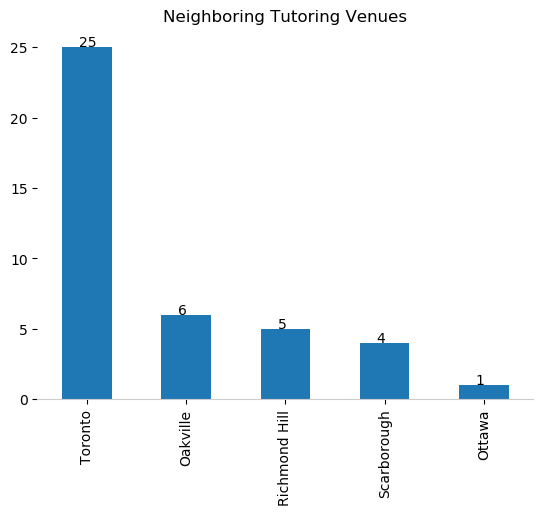

In [54]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

neighborhoods=['Toronto','Oakville','Richmond Hill','Scarborough','Ottawa']

y_pos = np.arange(len(neighborhoods))
ax=venues_df_count.plot( kind='bar')
#plt.yticks(y_pos, neighborhoods)
plt.xticks(y_pos, neighborhoods)
#plt.xlabel('Usage')
plt.title('Neighboring Tutoring Venues')
 
ax.spines['left'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['bottom'].set_color('#CCCCCC');
ax.legend().set_visible(False)
x_offset = -.08
y_offset = 0.04
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)   
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.show()



In [55]:
venues_dataframe.head()
len(venues_dataframe)


41

In [56]:
# map in competing venues 
#
for i in range(len(venues_dataframe)):
    latitude=(venues_dataframe['location.lat'].iloc[i])
    longitude=(venues_dataframe['location.lng'].iloc[i])
    popstring=venues_dataframe['name'].iloc[i]
    popstring=str(venues_dataframe['cluster'].iloc[i])+str(latitude)+str(longitude)
    
    if venues_dataframe['cluster'].iloc[i]==2: 
        print(venues_dataframe['cluster'].iloc[i],latitude, longitude)
        folium.CircleMarker([latitude,longitude],radius=4,color='red',fill=False,popup=popstring,
                                fill_opacity=.75 ).add_to(m)
m

2 43.6856699 -79.41703029999996
2 43.6749024388996 -79.42692518234253
2 43.681222 -79.392032
2 43.7027951 -79.439364
2 43.6749024388996 -79.42692518234253
2 43.6856699 -79.41703029999996
2 43.681222 -79.392032
2 43.7027951 -79.439364
2 43.6749024388996 -79.42692518234253
2 43.6856699 -79.41703029999996
2 43.681222 -79.392032
2 43.6749024388996 -79.42692518234253
2 43.6856699 -79.41703029999996
2 43.681222 -79.392032
2 43.69425236441406 -79.33291912078857
2 43.681222 -79.392032
2 43.6856699 -79.41703029999996
2 43.6749024388996 -79.42692518234253
2 43.681222 -79.392032
2 43.7027951 -79.439364
2 43.69425236441406 -79.33291912078857
2 43.6856699 -79.41703029999996
2 43.6749024388996 -79.42692518234253
2 43.681222 -79.392032
2 43.7027951 -79.439364


In [57]:
centers



[[6, 45.3534928, -75.7693796],
 [3, 43.859296, -79.465751],
 [2, 43.7201, -79.4143],
 [2, 43.6377585, -79.4971673],
 [2, 43.6618828, -79.4397232],
 [2, 43.6473095, -79.4173512],
 [2, 43.6553373, -79.3779509],
 [2, 43.6818631, -79.337862],
 [2, 43.6994457, -79.3950161],
 [2, 43.72, -79.4143],
 [4, 43.4591933, -79.7117058],
 [4, 43.4339276, -79.7292753],
 [5, 43.1808427, -79.2305854],
 [1, 43.7704262, -79.2478531],
 [1, 43.779948, -79.292082],
 [1, 43.8086882, -79.3178795],
 [1, 43.818416, -79.279883],
 [1, 43.874601, -79.351835],
 [1, 43.891178, -79.285357],
 [1, 43.8588085, -79.2473505]]

In [58]:
ratios=[['Scarborough',59,4],
       ['Toronto',55,25],
       ['Oakville',15,6],
       ['St. Catherines',10,0],
       ['Ottawa',7,1],
       ['Richmond Hill',7,5]]

In [59]:
ratios

[['Scarborough', 59, 4],
 ['Toronto', 55, 25],
 ['Oakville', 15, 6],
 ['St. Catherines', 10, 0],
 ['Ottawa', 7, 1],
 ['Richmond Hill', 7, 5]]

In [34]:
for i in range(len(ratios)):
    location = ratios[i][0]
    cluster_size=ratios[i][1]
    venue_size=ratios[i][2]
    
    print ('{:>20s}'.format(location),str(cluster_size)+":"+ str(venue_size))

         Scarborough 59:4
             Toronto 55:25
            Oakville 15:6
      St. Catherines 10:0
              Ottawa 7:1
       Richmond Hill 7:5
